In [ ]:
# Imports

import pandas as pd
import numpy as np
import torch

In [19]:
# Define feature columns and load data

FEATURE_NAMES = [
    "hw_features",
    "req_permissions",
    "app_components",
    "intents",
    "api_calls",
    "used_permissions",
    "sus_api_calls",
    "urls",
]

SCALAR_COLS = []

# Load data
df = pd.read_csv("test.csv")
df = df.replace(np.nan, "")

display(df)

,sha256,hw_features,req_permissions,app_components,intents,api_calls,used_permissions,sus_api_calls,urls,malware,family
0,00002d74a9faa53f5199c910b652ef09d3a7f6bd42b693...,"android.hardware.touchscreen,android.hardware....","android.permission.READ_PHONE_STATE,android.pe...",".GameBootReceiver,.GameService,GameAlertDialog...","android.intent.action.BOOT_COMPLETED,android.i...","java/net/HttpURLConnection,android/content/Con...","android.permission.INTERNET,android.permission...","Read/Write External Storage,getPackageInfo,pri...",http://client.go360days.com/client.php?action%...,1,GinMaster
1,000068216bdb459df847bfdd67dd11069c3c50166db1ea...,"android.hardware.touchscreen,","android.permission.WRITE_EXTERNAL_STORAGE,andr...","paklena.batterydiviner.Settings,paklena.batter...","android.intent.category.HOME,android.intent.ac...","android/content/Context;->startService,android...","android.permission.VIBRATE,","Read/Write External Storage,getSystemService,",,0,Benign
2,0000764713b286cfe7e8e76c7038c92312977712d9c5a8...,"android.hardware.touchscreen,android.hardware....","android.permission.ACCESS_FINE_LOCATION,androi...","BootReceiver,ru.alpha.AlphaReceiver,ru.alpha.A...","android.intent.category.HOME,android.intent.ac...",android/net/ConnectivityManager;->getActiveNet...,"android.permission.INTERNET,android.permission...","getDeviceId,Read/Write External Storage,Obfusc...","http://m-001.net/i/,m-001.net,http://m-001.net...",1,Opfake
3,0000962c2c34de1ca0c329b18be7847459da2d9d14b6b2...,"android.hardware.touchscreen,android.hardware....","android.permission.INTERNET,",".index,index,","android.intent.action.MAIN,android.intent.cate...","android/webkit/WebView,","android.permission.INTERNET,","getSystemService,",,0,Benign
4,000167f1ff061ea91440c40659c11c2af160342fd2e493...,"android.hardware.touchscreen,android.hardware....","android.permission.INTERNET,android.permission...","NokyART,.NokyArtWidget$UpdateService,.NokyArt,...","android.intent.action.MAIN,android.intent.cate...",android/net/ConnectivityManager;->getNetworkIn...,"android.permission.INTERNET,android.permission...","getSystemService,",http://nokyart.n97.fr/Application/android/inde...,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...
995,01e78d647cabf702bdbbb3af46ab70f2cbb407dfe6c6f8...,"android.hardware.touchscreen,android.hardware....","android.permission.INTERNET,android.permission...",".EmotionSensor,","android.intent.action.MAIN,android.intent.cate...",android/net/ConnectivityManager;->getActiveNet...,"android.permission.ACCESS_NETWORK_STATE,androi...","getPackageInfo,getSystemService,Cipher(AES/CBC...",http://schemas.android.com/apk/lib/com.google....,0,Benign
996,01e7a30caff13ed959ec74a26ec27564dea94389200ed9...,"android.hardware.touchscreen,","android.permission.WRITE_EXTERNAL_STORAGE,",".main,","android.intent.action.MAIN,android.intent.cate...",android/content/ContentResolver;->openInputStr...,"android.permission.INTERNET,android.permission...","Read/Write External Storage,getSystemService,",,0,Benign
997,01e7a6ea485da0acbe7ac6f7c1dbb20df27faa3a06130f...,"android.hardware.touchscreen,android.hardware....","android.permission.INTERNET,android.permission...",".zaragoza_872,","android.intent.action.MAIN,android.intent.cate...",android/telephony/TelephonyManager;->getDevice...,"android.permission.ACCESS_FINE_LOCATION,androi...","getDeviceId,printStackTrace,Read/Write Externa...",,0,Benign
998,01e86ce55b5175a75ed513d452c5a7169a56d013d822f1...,"android.hardware.touchscreen,android.hardware....","android.permission.INTERNET,com.android.vendin...",".MainActivity,","android.intent.action.MAIN,android.intent.cate...","android/app/Activity;->startActivity,android/m...","android.permission.READ_CONTACTS,android.permi...","printStackTrace,getPackageInfo,getSystemServic...","http://market.android.com/details?id%3D,http:/...",0,Benign


Before preprocessing (raw df):

| idx | sha256 | list_of_strings_feature_1 | list_of_strings_feature_2 | ... | binary_target | target_type (string) |
|-----|--------|---------------------------|---------------------------|-----|---------------|----------------------|
|   0 | abcde  |            "s1,s2,s3,..." |            "s1,s2,s3,..." | ... |             0 |              "Type1" |
|   1 | cbedf1 |            "s1,s2,s3,..." |            "s1,s2,s3,..." | ... |             1 |              "Type2" | 
|   2 | fffff1 |                        "" |            "s1,s2,s3,..." | ... |             1 |              "Type1" | 

---

After preprocessing:

| idx | sha256 | list_of_strings_feature_1 | list_of_strings_feature_2 | ... | binary_target | target_type (string) |
|-----|--------|---------------------------|---------------------------|-----|---------------|----------------------|
|   0 | abcde0 |   ["s1", "s2", "s3", ...] |   ["s1", "s2", "s3", ...] | ... |             0 |              "Type1" |
|   1 | cbedf1 |   ["s1", "s2", "s3", ...] |   ["s1", "s2", "s3", ...] | ... |             1 |              "Type2" | 
|   2 | fffff1 |                        [] |   ["s1", "s2", "s3", ...] | ... |             1 |              "Type1" | 

In [20]:
# Preprocess data by converting comma-separated strings to lists (see diagram above ^)

df = df.assign(**{col: df[col].str.split(",") for col in FEATURE_NAMES})
df = df.assign(
    **{
        col: df[col].apply(lambda x: [f for f in x if f.strip() != ""])
        for col in FEATURE_NAMES
    }
)

display(df)

,sha256,hw_features,req_permissions,app_components,intents,api_calls,used_permissions,sus_api_calls,urls,malware,family
0,00002d74a9faa53f5199c910b652ef09d3a7f6bd42b693...,"[android.hardware.touchscreen, android.hardwar...","[android.permission.READ_PHONE_STATE, android....","[.GameBootReceiver, .GameService, GameAlertDia...","[android.intent.action.BOOT_COMPLETED, android...","[java/net/HttpURLConnection, android/content/C...","[android.permission.INTERNET, android.permissi...","[Read/Write External Storage, getPackageInfo, ...",[http://client.go360days.com/client.php?action...,1,GinMaster
1,000068216bdb459df847bfdd67dd11069c3c50166db1ea...,[android.hardware.touchscreen],"[android.permission.WRITE_EXTERNAL_STORAGE, an...","[paklena.batterydiviner.Settings, paklena.batt...","[android.intent.category.HOME, android.intent....","[android/content/Context;->startService, andro...",[android.permission.VIBRATE],"[Read/Write External Storage, getSystemService]",[],0,Benign
2,0000764713b286cfe7e8e76c7038c92312977712d9c5a8...,"[android.hardware.touchscreen, android.hardwar...","[android.permission.ACCESS_FINE_LOCATION, andr...","[BootReceiver, ru.alpha.AlphaReceiver, ru.alph...","[android.intent.category.HOME, android.intent....",[android/net/ConnectivityManager;->getActiveNe...,"[android.permission.INTERNET, android.permissi...","[getDeviceId, Read/Write External Storage, Obf...","[http://m-001.net/i/, m-001.net, http://m-001....",1,Opfake
3,0000962c2c34de1ca0c329b18be7847459da2d9d14b6b2...,"[android.hardware.touchscreen, android.hardwar...",[android.permission.INTERNET],"[.index, index]","[android.intent.action.MAIN, android.intent.ca...",[android/webkit/WebView],[android.permission.INTERNET],[getSystemService],[],0,Benign
4,000167f1ff061ea91440c40659c11c2af160342fd2e493...,"[android.hardware.touchscreen, android.hardwar...","[android.permission.INTERNET, android.permissi...","[NokyART, .NokyArtWidget$UpdateService, .NokyA...","[android.intent.action.MAIN, android.intent.ca...",[android/net/ConnectivityManager;->getNetworkI...,"[android.permission.INTERNET, android.permissi...",[getSystemService],[http://nokyart.n97.fr/Application/android/ind...,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...
995,01e78d647cabf702bdbbb3af46ab70f2cbb407dfe6c6f8...,"[android.hardware.touchscreen, android.hardwar...","[android.permission.INTERNET, android.permissi...",[.EmotionSensor],"[android.intent.action.MAIN, android.intent.ca...",[android/net/ConnectivityManager;->getActiveNe...,"[android.permission.ACCESS_NETWORK_STATE, andr...","[getPackageInfo, getSystemService, Cipher(AES/...",[http://schemas.android.com/apk/lib/com.google...,0,Benign
996,01e7a30caff13ed959ec74a26ec27564dea94389200ed9...,[android.hardware.touchscreen],[android.permission.WRITE_EXTERNAL_STORAGE],[.main],"[android.intent.action.MAIN, android.intent.ca...",[android/content/ContentResolver;->openInputSt...,"[android.permission.INTERNET, android.permissi...","[Read/Write External Storage, getSystemService]",[],0,Benign
997,01e7a6ea485da0acbe7ac6f7c1dbb20df27faa3a06130f...,"[android.hardware.touchscreen, android.hardwar...","[android.permission.INTERNET, android.permissi...",[.zaragoza_872],"[android.intent.action.MAIN, android.intent.ca...",[android/telephony/TelephonyManager;->getDevic...,"[android.permission.ACCESS_FINE_LOCATION, andr...","[getDeviceId, printStackTrace, Read/Write Exte...",[],0,Benign
998,01e86ce55b5175a75ed513d452c5a7169a56d013d822f1...,"[android.hardware.touchscreen, android.hardwar...","[android.permission.INTERNET, com.android.vend...",[.MainActivity],"[android.intent.action.MAIN, android.intent.ca...","[android/app/Activity;->startActivity, android...","[android.permission.READ_CONTACTS, android.per...","[printStackTrace, getPackageInfo, getSystemSer...","[http://market.android.com/details?id%3D, http...",0,Benign


In [21]:
from torchtext.vocab import build_vocab_from_iterator


def create_vocab_for_column(df, col, specials=["<PAD>", "<UNK>", "<EMPTY>"]):
    all_values = [val for seq in df[col] for val in seq]
    vocab = build_vocab_from_iterator([all_values], specials=specials)
    vocab.set_default_index(vocab["<UNK>"])
    return vocab


# Build vocabulary for each feature column
vocab_dict = {col: create_vocab_for_column(df, col) for col in FEATURE_NAMES}

print(vocab_dict["hw_features"].get_itos())

['<PAD>', '<UNK>', '<EMPTY>', 'android.hardware.touchscreen', 'android.hardware.screen.portrait', 'android.hardware.location', 'android.hardware.location.network', 'android.hardware.location.gps', 'android.hardware.telephony', 'android.hardware.wifi', 'android.hardware.screen.landscape', 'android.hardware.camera', 'android.hardware.camera.autofocus', 'android.hardware.microphone', 'android.hardware.bluetooth', 'android.software.live_wallpaper', 'android.hardware.touchscreen.multitouch', 'android.hardware.sensor.accelerometer', 'ACCESS_COARSE_LOCATION', 'READ_SMS', 'RECEIVE_SMS', 'android.hardware.camera.flash', 'android.hardware.nfc', 'android.hardware.sensor.compass']


In [22]:
from torch.utils.data import Dataset


# Dataset wraper for the Debrim dataset
class DebrimDataset(Dataset):
    def __init__(self, df, vocab_dict, scalar_cols, label_col):
        self.df = df
        self.vocab_dict = vocab_dict
        self.scalar_cols = scalar_cols
        self.label_col = label_col

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        features = {
            col: torch.tensor(self.vocab_dict[col](row[col]), dtype=torch.long)
            for col in self.vocab_dict.keys()
        }

        scalars = {
            col: torch.tensor(row[col], dtype=torch.float) for col in self.scalar_cols
        }

        label = torch.tensor(row[self.label_col], dtype=torch.long)

        return features, scalars, label


# Function to handle batching with variable sequence lengths
def collate_fn(batch):
    features, scalars, label = zip(*batch)

    # Pad sequences to the same length
    features = {
        col: torch.nn.utils.rnn.pad_sequence(
            [f[col] for f in features], batch_first=True
        )
        for col in features[0].keys()
    }

    # Stack scalars and label
    scalars = {col: torch.stack([s[col] for s in scalars]) for col in scalars[0].keys()}

    label = torch.stack(label)

    return features, scalars, label

In [23]:
import torch.nn as nn


# Model definition
class DebrimModel(nn.Module):
    def __init__(
        self,
        vocab_dict,
        scalar_dim,
        embedding_dim=128,
        seq_pooling="mean",
        hidden_dim=[128, 64],
        n_classes=2,
        dropout=0.5,
    ):
        super().__init__()

        self.seq_pooling = seq_pooling

        # Embedding layer for each feature
        self.embedders = nn.ModuleDict(
            {
                col: nn.Embedding(
                    num_embeddings=len(vocab),
                    embedding_dim=embedding_dim,
                    padding_idx=vocab["<PAD>"],
                )
                for col, vocab in vocab_dict.items()
            }
        )

        total_dim = embedding_dim * len(vocab_dict) + scalar_dim

        # MLP layers
        layers = []
        dims = [total_dim] + hidden_dim
        for in_d, out_d in zip(dims, dims[1:]):
            layers += [nn.Linear(in_d, out_d), nn.ReLU(), nn.Dropout(dropout)]

        layers.append(nn.Linear(dims[-1], n_classes))
        self.mlp = nn.Sequential(*layers)

    def forward(self, seq_feats, scalars):
        pooled = []
        for col, seq in seq_feats.items():
            emb = self.embedders[col](seq)  # [Batch, Length, Embed_dim]

            if self.seq_pooling == "mean":
                # Mean pooling
                mask = (seq != 0).unsqueeze(-1)  # [B, L, 1]
                summed = (emb * mask).sum(dim=1)  # [B, E]
                counts = mask.sum(dim=1).clamp(min=1)
                pooled.append(summed / counts)  # [B, E]
            else:
                # Max pooling
                emb = emb.masked_fill(seq.unsqueeze(-1) == 0, float("-inf"))
                pooled.append(emb.max(dim=1).values)  # [B, E]

        scalar_vecs = [scalars[col] for col in scalars]
        if scalar_vecs:
            scalars = torch.cat(scalar_vecs, dim=1)
            pooled.append(scalars)

        x = torch.cat(pooled, dim=1)  # [B, total_dim]
        logits = self.mlp(x)  # [B, n_classes]
        return logits

In [24]:
# Basic training loop

from torch.utils.data import DataLoader
import torch.optim as optim

# Hyperparameters
BATCH_SIZE = 64
LR = 1e-3
EPOCHS = 20

# Create dataset & loader
dataset = DebrimDataset(df, vocab_dict, scalar_cols=SCALAR_COLS, label_col="malware")
loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

# Instantiate model
model = DebrimModel(vocab_dict, scalar_dim=len(SCALAR_COLS))
optimizer = optim.Adam(model.parameters(), lr=LR)
criterion = nn.CrossEntropyLoss()

# Check for CUDA support
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model = model.to(device)

# Training loop
model.train()
for epoch in range(EPOCHS):
    epoch_train_loss = 0
    for seq_feats, scalars, label in loader:
        # Move data to device
        seq_feats = {k: v.to(device) for k, v in seq_feats.items()}
        scalars = {k: v.to(device) for k, v in scalars.items()}
        label = label.to(device)

        # Forward pass
        optimizer.zero_grad()
        logits = model(seq_feats, scalars)
        loss = criterion(logits, label)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    print(f"Epoch {epoch + 1}/{EPOCHS} — Loss: {epoch_train_loss / len(loader):.4f}")

Using device: cuda
Epoch 1/20 — Loss: 0.2977
Epoch 2/20 — Loss: 0.1407
Epoch 3/20 — Loss: 0.1174
Epoch 4/20 — Loss: 0.0933
Epoch 5/20 — Loss: 0.0783
Epoch 6/20 — Loss: 0.0665
Epoch 7/20 — Loss: 0.0581
Epoch 8/20 — Loss: 0.0386
Epoch 9/20 — Loss: 0.0325
Epoch 10/20 — Loss: 0.0277
Epoch 11/20 — Loss: 0.0279
Epoch 12/20 — Loss: 0.0257
Epoch 13/20 — Loss: 0.0125
Epoch 14/20 — Loss: 0.0131
Epoch 15/20 — Loss: 0.0100
Epoch 16/20 — Loss: 0.0067
Epoch 17/20 — Loss: 0.0035
Epoch 18/20 — Loss: 0.0033
Epoch 19/20 — Loss: 0.0038
Epoch 20/20 — Loss: 0.0101


In [25]:
# K-fold cross-validation with early stopping

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    auc,
    roc_auc_score,
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
)
from torch.utils.data import DataLoader
import os
import tempfile
import torch.nn.functional as F

# Hyperparameters
BATCH_SIZE = 64
LR = 1e-3
EPOCHS = 20
FOLDS = 5
PATIENCE = 5

# Check for CUDA support
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

# Compute class weights to handle imbalanced data
y = df["malware"].values
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)

nn_fold_results = {
    "precision": [],
    "recall": [],
    "f1": [],
    "pr_auc": [],
    "roc_auc": [],
    "pr_curve_data": [],
    "roc_curve_data": [],
    "conf_matrices": [],
    "model_size": [],
    "train_losses": [],
    "val_losses": [],
}

# Training and evaluation for each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(df)):
    print(f"\n=== Fold {fold + 1}/{FOLDS} ===")

    # Split data into train and validation sets and create datasets / loaders
    train_df = df.iloc[train_idx].reset_index(drop=True)
    val_df = df.iloc[val_idx].reset_index(drop=True)

    train_dataset = DebrimDataset(
        train_df, vocab_dict, scalar_cols=SCALAR_COLS, label_col="malware"
    )
    val_dataset = DebrimDataset(
        val_df, vocab_dict, scalar_cols=SCALAR_COLS, label_col="malware"
    )

    train_loader = DataLoader(
        train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn
    )
    val_loader = DataLoader(
        val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn
    )

    # Instantiate model
    model = DebrimModel(vocab_dict, scalar_dim=len(SCALAR_COLS)).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=LR)
    criterion = torch.nn.CrossEntropyLoss(weight=weights_tensor)

    best_val_loss = float("inf")
    epochs_no_improve = 0

    # Training loop
    train_losses, val_losses = [], []
    for epoch in range(EPOCHS):
        model.train()
        epoch_train_loss = 0

        # Same as before, forward pass
        for seq_feats, scalars, label in train_loader:
            seq_feats = {k: v.to(device) for k, v in seq_feats.items()}
            scalars = {k: v.to(device) for k, v in scalars.items()}
            label = label.to(device)

            optimizer.zero_grad()
            logits = model(seq_feats, scalars)
            loss = criterion(logits, label)
            loss.backward()
            optimizer.step()

            epoch_train_loss += loss.item()

        avg_train_loss = epoch_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation phase
        model.eval()
        epoch_val_loss = 0
        y_true, y_pred, y_prob = [], [], []

        with torch.no_grad():
            for seq_feats, scalars, label in val_loader:
                seq_feats = {k: v.to(device) for k, v in seq_feats.items()}
                scalars = {k: v.to(device) for k, v in scalars.items()}
                label = label.to(device)

                logits = model(seq_feats, scalars)
                loss = criterion(logits, label)
                epoch_val_loss += loss.item()

                preds = torch.argmax(logits, dim=1)
                probs = F.softmax(logits, dim=1)[:, 1]  # Probability of positive class

                y_true.extend(label.cpu().tolist())
                y_pred.extend(preds.cpu().tolist())
                y_prob.extend(probs.cpu().tolist())

        # Calculate metrics
        avg_val_loss = epoch_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)

        f1 = f1_score(y_true, y_pred, average="weighted")
        precision = precision_score(y_true, y_pred, average="weighted")
        recall = recall_score(y_true, y_pred, average="weighted")
        
        pr_precision, pr_recall, _ = precision_recall_curve(y_true, y_prob)
        pr_auc = auc(pr_recall, pr_precision)
        
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        roc_auc = auc(fpr, tpr)

        cm = confusion_matrix(y_true, y_pred)

        # Get model size
        fd, path = tempfile.mkstemp()
        os.close(fd)
        torch.save(model.state_dict(), path)
        size = os.path.getsize(path) / 1024  # KB
        os.remove(path)

        print(
            f"Epoch {epoch + 1}: Train Loss = {avg_train_loss:.4f}, Val Loss = {avg_val_loss:.4f}, F1 = {f1:.4f}"
        )

        nn_fold_results["precision"].append(precision)
        nn_fold_results["recall"].append(recall)
        nn_fold_results["f1"].append(f1)
        nn_fold_results["pr_auc"].append(pr_auc)
        nn_fold_results["roc_auc"].append(roc_auc)
        nn_fold_results["pr_curve_data"].append((pr_precision, pr_recall))
        nn_fold_results["roc_curve_data"].append((fpr, tpr))
        nn_fold_results["conf_matrices"].append(cm)
        nn_fold_results["model_size"].append(size)
        nn_fold_results['train_losses'].append(train_losses)
        nn_fold_results['val_losses'].append(val_losses)

        # Check for improvement
        if avg_val_loss < best_val_loss:
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        # Early stopping
        if epochs_no_improve >= PATIENCE:
            print("Early stopping.")
            break

Using device: cuda

=== Fold 1/5 ===
Epoch 1: Train Loss = 0.6273, Val Loss = 0.4425, F1 = 0.9800
Epoch 2: Train Loss = 0.3962, Val Loss = 0.2862, F1 = 0.9626
Epoch 3: Train Loss = 0.3161, Val Loss = 0.1767, F1 = 0.9484
Epoch 4: Train Loss = 0.2192, Val Loss = 0.1220, F1 = 0.9484
Epoch 5: Train Loss = 0.1558, Val Loss = 0.0886, F1 = 0.9739
Epoch 6: Train Loss = 0.1654, Val Loss = 0.0820, F1 = 0.9662
Epoch 7: Train Loss = 0.1288, Val Loss = 0.0967, F1 = 0.9519
Epoch 8: Train Loss = 0.1169, Val Loss = 0.0560, F1 = 0.9819
Epoch 9: Train Loss = 0.0804, Val Loss = 0.0475, F1 = 0.9739
Epoch 10: Train Loss = 0.0667, Val Loss = 0.0504, F1 = 0.9700
Epoch 11: Train Loss = 0.0613, Val Loss = 0.0349, F1 = 0.9819
Epoch 12: Train Loss = 0.0366, Val Loss = 0.0326, F1 = 0.9819
Epoch 13: Train Loss = 0.0688, Val Loss = 0.0312, F1 = 0.9819
Epoch 14: Train Loss = 0.0399, Val Loss = 0.0344, F1 = 0.9778
Epoch 15: Train Loss = 0.0477, Val Loss = 0.0364, F1 = 0.9739
Epoch 16: Train Loss = 0.0367, Val Loss = 

In [26]:
# Summary of results
# print("\n=== Cross-validation results ===")
# for result in nn_fold_results:
#     print(f"Fold {result['fold']}: F1 Score = {result['f1']:.4f}")
#     print("Classification Report:")
#     print(pd.DataFrame(result["report"]).T, end="\n\n")
#     print("===" * 10)

# print("\n=== Overall Results ===")
# avg_f1 = np.mean([result["f1"] for result in nn_fold_results])
# print(f"Average F1 Score = {avg_f1:.4f}")

In [27]:
# Prediction function for inference
def predict(model, df, vocab_dict, scalar_cols, device, batch_size=64):
    model.eval()
    dataset = DebrimDataset(
        df, vocab_dict, scalar_cols=scalar_cols, label_col="malware"
    )
    loader = DataLoader(
        dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn
    )

    all_preds = []
    all_probs = []

    with torch.no_grad():
        for seq_feats, scalars, _ in loader:
            seq_feats = {k: v.to(device) for k, v in seq_feats.items()}
            scalars = {k: v.to(device) for k, v in scalars.items()}

            logits = model(seq_feats, scalars)
            probs = torch.softmax(logits, dim=1)
            preds = torch.argmax(probs, dim=1)

            all_preds.extend(preds.cpu().tolist())
            all_probs.extend(probs.cpu().tolist())

    return all_preds, all_probs

In [28]:
# Example prediction on new data

# TODO: Example usage
new_df = pd.read_csv("new_test.csv")
new_df = new_df.replace(np.nan, "")
new_df = new_df.assign(**{col: new_df[col].str.split(",") for col in FEATURE_NAMES})
new_df = new_df.assign(
    **{
        col: new_df[col].apply(lambda x: [f for f in x if f.strip() != ""])
        for col in FEATURE_NAMES
    }
)

# Get predictions using trained model
preds, probs = predict(model, new_df, vocab_dict, SCALAR_COLS, device)

# Results
for i, (p, pr) in enumerate(zip(preds, probs)):
    print(f"Sample {i} — Predicted: {p}, Probabilities: {pr}")

Sample 0 — Predicted: 1, Probabilities: [0.00010993776959367096, 0.9998900890350342]


In [29]:
# Save / Load model
import os


os.makedirs("./nn_models", exist_ok=True)

# Save model weights to disk
torch.save(model.state_dict(), "./nn_models/debrim_model.pt")

# Load model weights from disk
model = DebrimModel(vocab_dict, scalar_dim=len(SCALAR_COLS))
model.load_state_dict(torch.load("./nn_models/debrim_model.pt"))
model.to(device)
model.eval()

DebrimModel(
  (embedders): ModuleDict(
    (hw_features): Embedding(24, 128, padding_idx=0)
    (req_permissions): Embedding(183, 128, padding_idx=0)
    (app_components): Embedding(3969, 128, padding_idx=0)
    (intents): Embedding(206, 128, padding_idx=0)
    (api_calls): Embedding(127, 128, padding_idx=0)
    (used_permissions): Embedding(43, 128, padding_idx=0)
    (sus_api_calls): Embedding(117, 128, padding_idx=0)
    (urls): Embedding(6175, 128, padding_idx=0)
  )
  (mlp): Sequential(
    (0): Linear(in_features=1024, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=64, out_features=2, bias=True)
  )
)

# CLASIC ML MODELS

In [30]:
# Clasical ML models

# Extract embeddings from the neural network model
def extract_embeddings(model, df, vocab_dict, scalar_cols, device, batch_size=64):
    model.eval()
    dataset = DebrimDataset(
        df, vocab_dict, scalar_cols=scalar_cols, label_col="malware"
    )
    loader = DataLoader(
        dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn
    )

    all_embeddings = []
    all_labels = []

    with torch.no_grad():
        for seq_feats, scalars, labels in loader:
            seq_feats = {k: v.to(device) for k, v in seq_feats.items()}
            scalars = {k: v.to(device) for k, v in scalars.items()}

            # Get embeddings for each feature
            pooled_embeddings = []
            for col, seq in seq_feats.items():
                emb = model.embedders[col](seq)

                # Apply the same pooling as in the model
                if model.seq_pooling == "mean":
                    mask = (seq != 0).unsqueeze(-1)
                    summed = (emb * mask).sum(dim=1)
                    counts = mask.sum(dim=1).clamp(min=1)
                    pooled_embeddings.append((summed / counts).cpu().tolist())
                else:
                    emb = emb.masked_fill(seq.unsqueeze(-1) == 0, float("-inf"))
                    pooled_embeddings.append(emb.max(dim=1).values.cpu().tolist())

            # Concatenate all embeddings
            batch_embeddings = np.concatenate(pooled_embeddings, axis=1)
            all_embeddings.append(batch_embeddings)
            all_labels.append(labels.cpu().tolist())

    return np.vstack(all_embeddings), np.concatenate(all_labels)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
from sklearn.model_selection import StratifiedKFold
import os
import pickle

# Train classical models using cross-validation
def train_classical_models_cv(models, X, y, cv=5):
    kf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    classical_fold_results = {
        name: {'precision': [],
               'recall': [],
               'f1': [],
               'pr_auc': [],
               'roc_auc': [],
               'pr_curve_data': [],
                'roc_curve_data': [],
               'conf_matrices': [],
               'model_size': []
             }
        for name in models
    }

    for fold, (train_idx, test_idx) in enumerate(kf.split(X, y), 1):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        for name, model in models.items():
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1]

            # Calculate metrics
            precision = precision_score(y_test, y_pred, average='weighted')
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')
            
            pr_precision, pr_recall, _ = precision_recall_curve(y_test, y_prob)
            pr_auc = auc(pr_recall, pr_precision)
            
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)
            
            cm = confusion_matrix(y_test, y_pred)

            # Get model size
            fd, path = tempfile.mkstemp()
            os.close(fd)
            pickle.dump(model, open(path, 'wb'))
            size = os.path.getsize(path) / 1024
            os.remove(path)
            
            classical_fold_results[name]['precision'].append(precision)
            classical_fold_results[name]['recall'].append(recall)
            classical_fold_results[name]['f1'].append(f1)
            classical_fold_results[name]['pr_auc'].append(pr_auc)
            classical_fold_results[name]['roc_auc'].append(roc_auc)
            classical_fold_results[name]['pr_curve_data'].append((pr_precision, pr_recall))
            classical_fold_results[name]['roc_curve_data'].append((fpr, tpr))
            classical_fold_results[name]['conf_matrices'].append(cm)
            classical_fold_results[name]['model_size'].append(size)

    return classical_fold_results

In [32]:
# Example usage of the loaded model for prediction

X, y = extract_embeddings(model, df, vocab_dict, SCALAR_COLS, device)
print(f"Extracted embeddings shape: {X.shape}, Labels shape: {y.shape}")

# Define classical models
models = {
    "random_forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "decision_tree": DecisionTreeClassifier(random_state=42),
    "knn": KNeighborsClassifier(n_neighbors=5),
    "logistic_regression": LogisticRegression(max_iter=1000, random_state=42),
    "svm": SVC(probability=True, random_state=42),
}

# Train classical models using cross-validation
cv_results = train_classical_models_cv(models, X, y, cv=5)

Extracted embeddings shape: (1000, 1024), Labels shape: (1000,)


In [33]:
# # Show cross-validation results
# print("\n=== Classical Models Cross-Validation Results ===")
# for name, report in cv_results.items():
#     print(f"Model: '{name}' - Report:")
#     print(pd.DataFrame(report).T, end="\n\n")
#     print("===" * 10)

In [34]:
import joblib
import os


os.makedirs("./classic_models", exist_ok=True)

# Save the classical models
for name, model in models.items():
    joblib.dump(model, f"./classic_models/{name}_model.pkl")

# Load the classical models
for name in models.keys():
    models[name] = joblib.load(f"./classic_models/{name}_model.pkl")

# COMPARISON OF RESULTS

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 8)

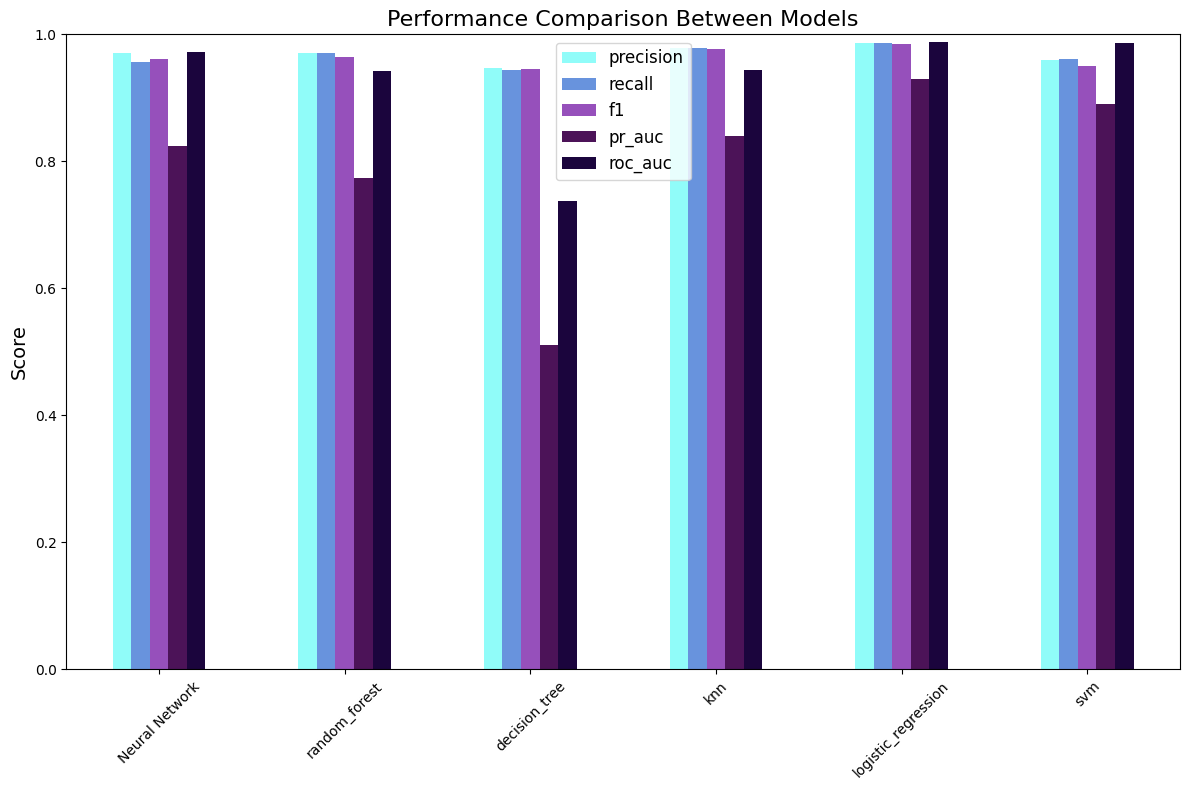

In [ ]:
# Organize results for plotting
def prepare_metrics_for_comparison(nn_results, classic_results):
    # Neural Network data - average metrics across folds
    nn_metrics = {
        'precision': np.mean(nn_results['precision']),
        'recall': np.mean(nn_results['recall']),
        'f1': np.mean(nn_results['f1']),
        'pr_auc': np.mean(nn_results['pr_auc']),
        'roc_auc': np.mean(nn_results['roc_auc']),
        'model_size': np.mean(nn_results['model_size'])
    }
    
    # Classical models data - average metrics across folds for each model
    classic_metrics = {}
    for model_name, results in classic_results.items():
        classic_metrics[model_name] = {
            'precision': np.mean(results['precision']),
            'recall': np.mean(results['recall']),
            'f1': np.mean(results['f1']),
            'pr_auc': np.mean(results['pr_auc']),
            'roc_auc': np.mean(results['roc_auc']),
            'model_size': np.mean(results['model_size'])
        }
    
    # Combine all results
    all_models = {'Neural Network': nn_metrics}
    all_models.update(classic_metrics)
    
    return all_models

# Prepare data
all_models = prepare_metrics_for_comparison(nn_fold_results, cv_results)

# Convert to DataFrame for easier plotting
df_metrics = pd.DataFrame.from_dict(all_models, orient='index')

# Plot performance metrics for all models
metrics_to_plot = ['precision', 'recall', 'f1', 'pr_auc', 'roc_auc']

fig, ax = plt.subplots(figsize=(12, 8))
df_metrics[metrics_to_plot].plot(kind='bar', ax=ax, color=['#1B053D', '#6893dd', '#9650BB', '#4C1358', '#90fcf9'])
plt.title('Performance Comparison Between Models', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# Display metrics for all models
print("\n=== Performance Metrics for All Models ===")
display(df_metrics[metrics_to_plot])


=== Performance Metrics for All Models ===


,precision,recall,f1,pr_auc,roc_auc,model_size
Neural Network,0.970057,0.9558,0.960470,0.823779,0.972615,5972.613281
random_forest,0.969940,0.9700,0.964278,0.774359,0.942925,317.201953
decision_tree,0.947147,0.9440,0.944899,0.511398,0.737805,4.102539
knn,0.978387,0.9790,0.977574,0.839249,0.944523,6406.913086
logistic_regression,0.986467,0.9860,0.985360,0.930236,0.988471,8.705078
svm,0.959653,0.9610,0.950646,0.890056,0.986204,1269.951562


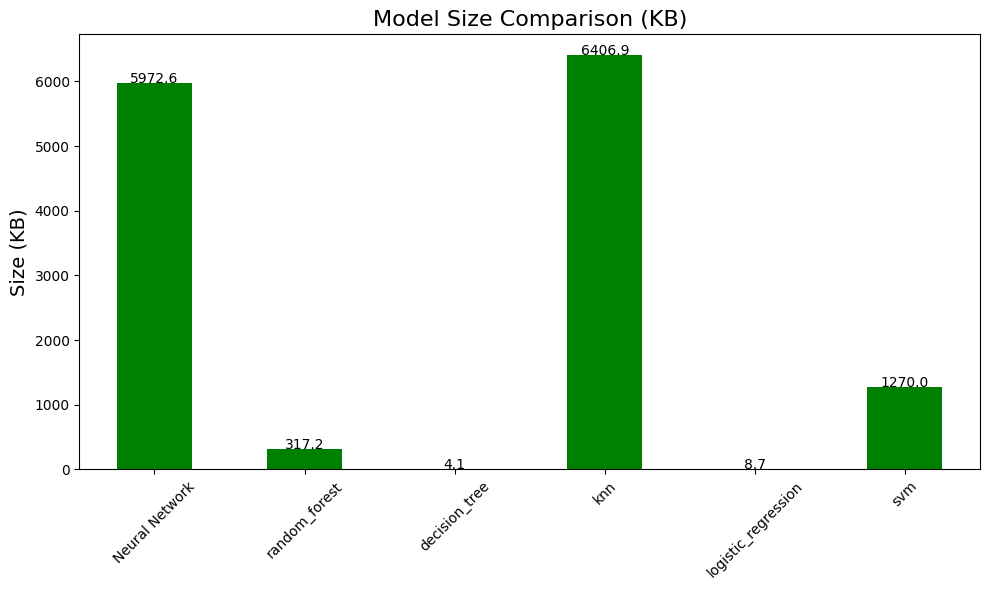

In [52]:
# Visualize model sizes for comparison
plt.figure(figsize=(10, 6))
sizes = df_metrics['model_size']
sizes.plot(kind='bar', color='green')
plt.title('Model Size Comparison (KB)', fontsize=16)
plt.ylabel('Size (KB)', fontsize=14)
plt.xticks(rotation=45)

# Add annotations with exact sizes
for i, v in enumerate(sizes):
    plt.text(i, v + 5, f"{v:.1f}", ha='center')

plt.tight_layout()
plt.show()

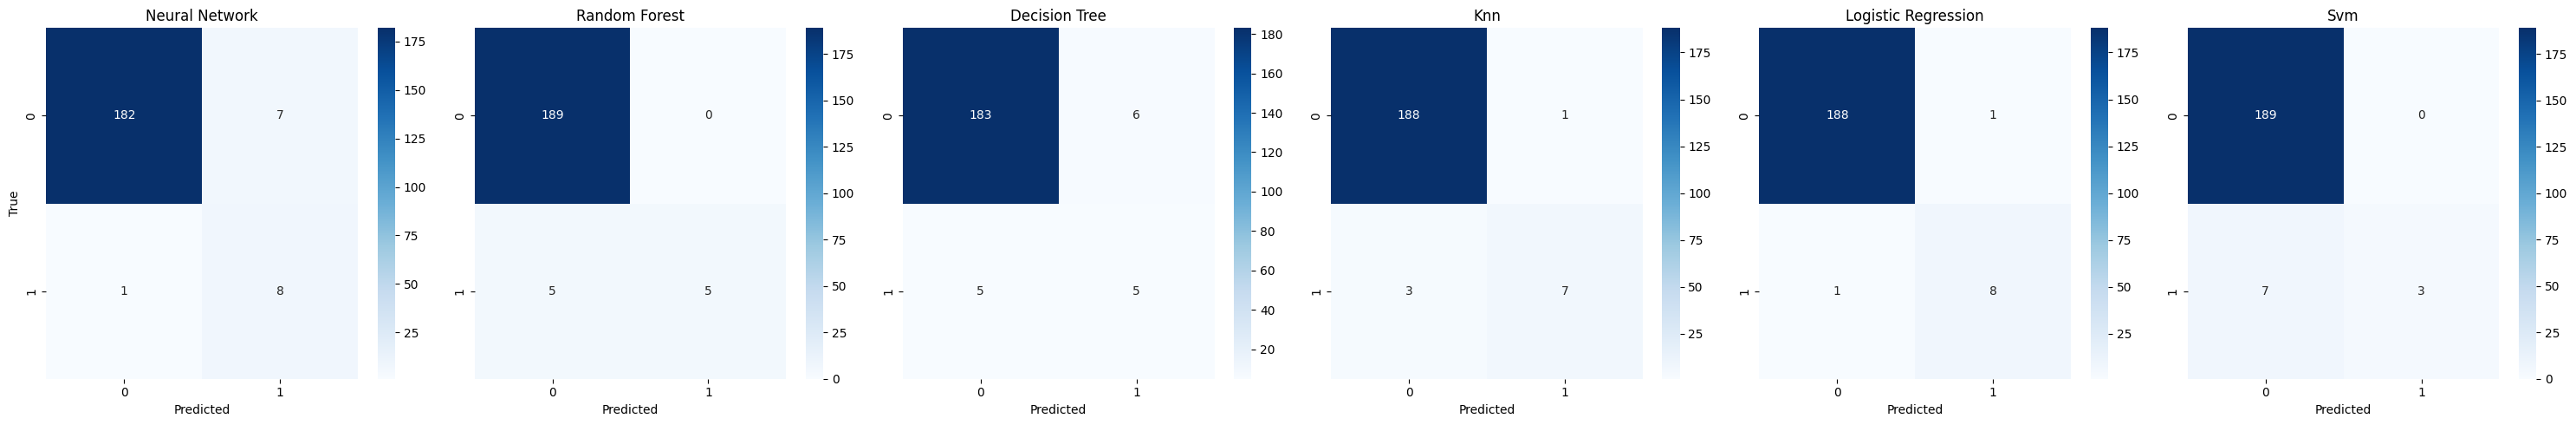

In [53]:
# Visualize confusion matrices for all models
def plot_confusion_matrices(nn_results, classic_results):
    # Calculate the mean confusion matrix across folds
    nn_cms = np.array(nn_results['conf_matrices'])
    nn_cm_mean = nn_cms.mean(axis=0).astype(int)
    
    # Setup the figure
    num_classic_models = len(classic_results)
    fig, axes = plt.subplots(1, num_classic_models + 1, figsize=(5*(num_classic_models + 1), 5))
    
    # Plot neural network confusion matrix
    sns.heatmap(nn_cm_mean, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title('Neural Network')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')
    
    # Plot classic model confusion matrices
    for i, (name, results) in enumerate(classic_results.items(), 1):
        # Calculate mean confusion matrix for this model
        model_cms = np.array(results['conf_matrices'])
        model_cm_mean = model_cms.mean(axis=0).astype(int)
        
        sns.heatmap(model_cm_mean, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(name.replace('_', ' ').title())
        axes[i].set_xlabel('Predicted')
        
    plt.tight_layout()
    plt.show()
    
plot_confusion_matrices(nn_fold_results, cv_results)

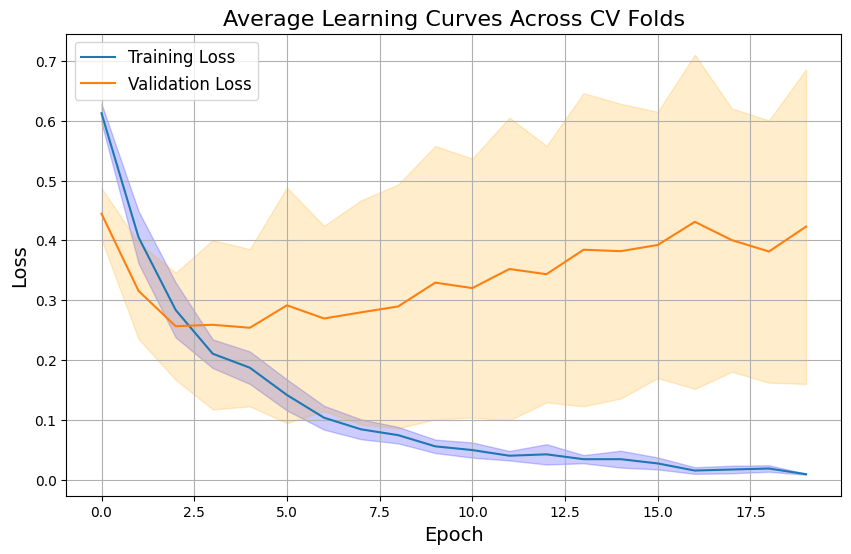

In [ ]:
# Plot training and validation loss curves
def plot_learning_curves(nn_fold_results):    
    # Calculate mean training and validation losses across all folds
    train_losses_by_epoch = np.array(nn_fold_results['train_losses']).mean(axis=0)
    val_losses_by_epoch = np.array(nn_fold_results['val_losses']).mean(axis=0)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses_by_epoch, label='Training Loss')
    plt.plot(val_losses_by_epoch, label='Validation Loss')
    plt.title('Average Learning Curves Across CV Folds', fontsize=16)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    
    # Standard deviation shading
    if len(nn_fold_results['train_losses']) > 1:
        train_std = np.array(nn_fold_results['train_losses']).std(axis=0)
        val_std = np.array(nn_fold_results['val_losses']).std(axis=0)
        
        epochs = range(len(train_losses_by_epoch))
        plt.fill_between(epochs, train_losses_by_epoch - train_std, 
                         train_losses_by_epoch + train_std, alpha=0.2, color='blue')
        plt.fill_between(epochs, val_losses_by_epoch - val_std,
                         val_losses_by_epoch + val_std, alpha=0.2, color='orange')
    
    plt.show()
    
plot_learning_curves(nn_fold_results)

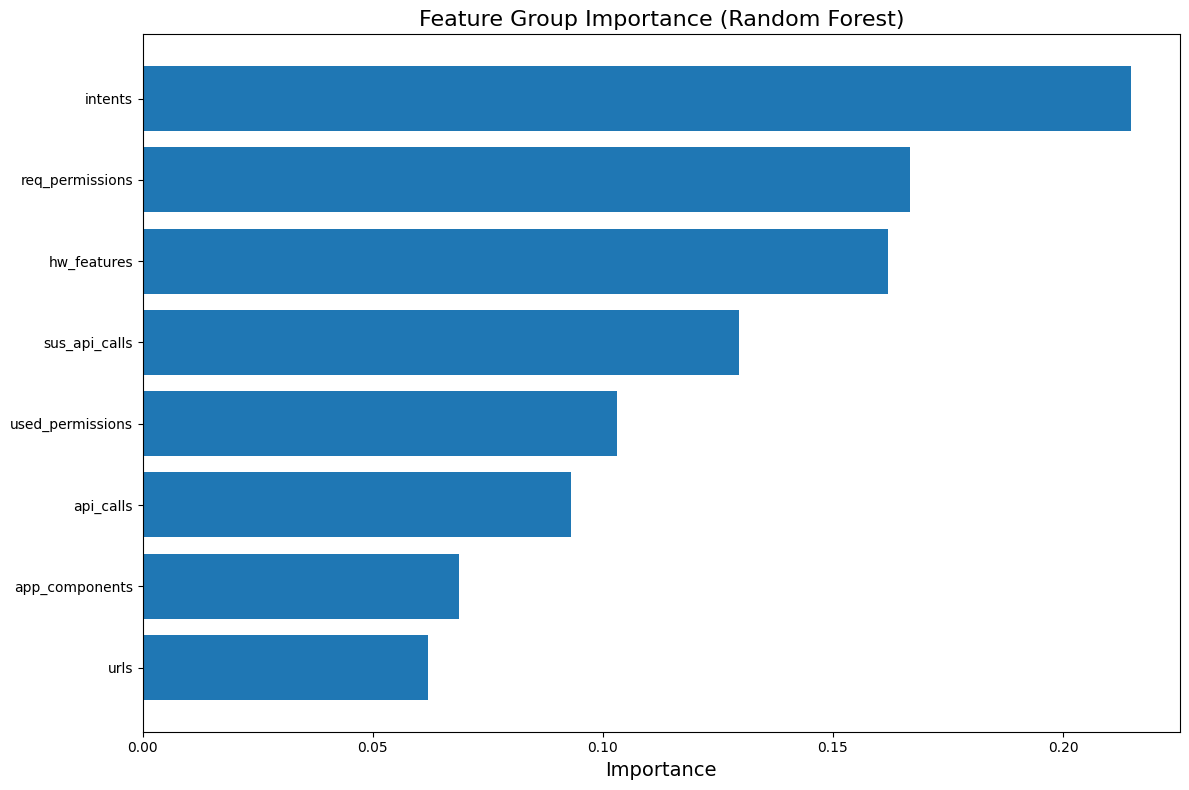

In [42]:
# Extract feature importance from tree-based models
def plot_feature_importance(models, X):
    # Feature dimension for each embedding
    embedding_dim = 128
    num_features = X.shape[1] // embedding_dim
    
    # Get feature importance from Random Forest
    if 'random_forest' in models:
        importances = models['random_forest'].feature_importances_
        
        # Aggregate importance by feature group
        feature_groups = []
        for i in range(num_features):
            start_idx = i * embedding_dim
            end_idx = (i + 1) * embedding_dim
            group_importance = np.sum(importances[start_idx:end_idx])
            feature_groups.append((FEATURE_NAMES[i], group_importance))
        
        # Sort by importance
        feature_groups.sort(key=lambda x: x[1], reverse=True)
        
        # Plot
        plt.figure(figsize=(12, 8))
        names, values = zip(*feature_groups)
        plt.barh(names, values)
        plt.title('Feature Group Importance (Random Forest)', fontsize=16)
        plt.xlabel('Importance', fontsize=14)
        plt.gca().invert_yaxis()  # Highest importance at the top
        plt.tight_layout()
        plt.show()

plot_feature_importance(models, X)

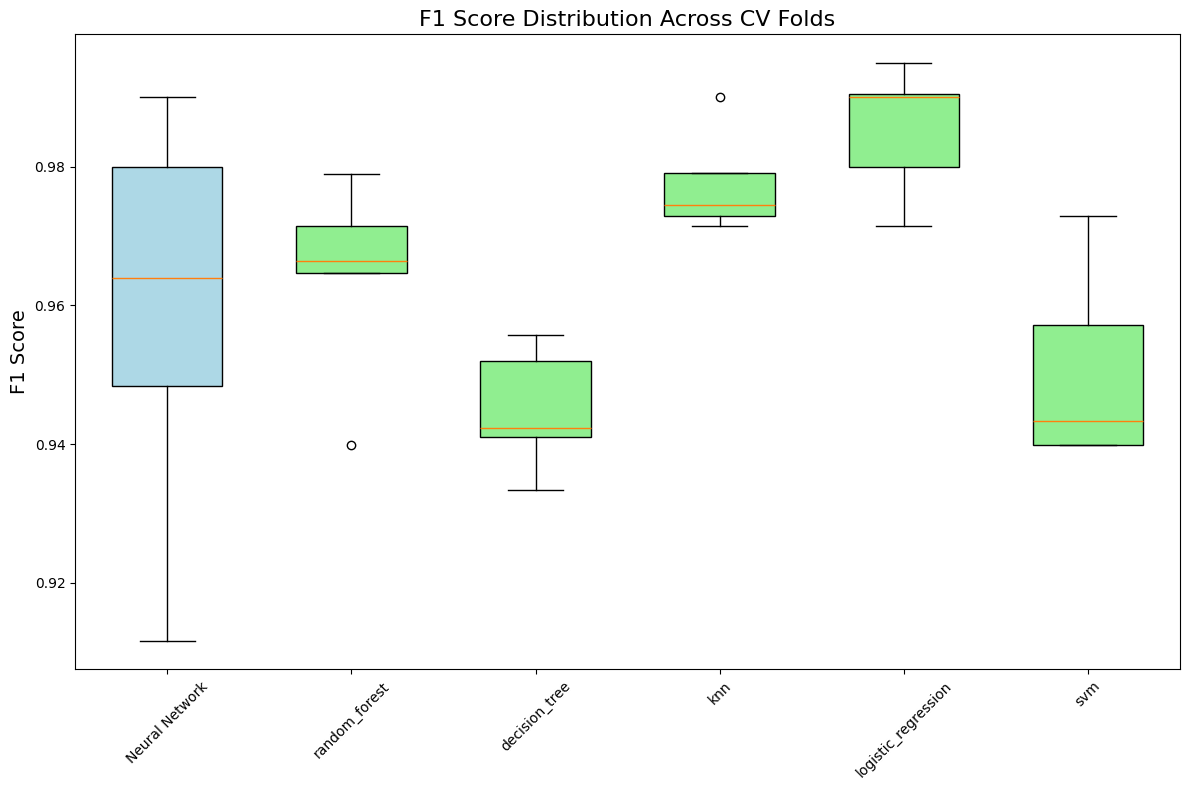

In [43]:
# Visualize score distribution across CV folds
def plot_cv_distribution(nn_results, classic_results):
    plt.figure(figsize=(12, 8))
    
    # Add neural network results
    nn_f1 = nn_results['f1']
    plt.boxplot([nn_f1], positions=[0], widths=0.6, patch_artist=True,
                boxprops=dict(facecolor='lightblue'))
    
    # Add classical model results
    classic_positions = list(range(1, len(classic_results) + 1))
    classic_f1 = [results['f1'] for results in classic_results.values()]
    plt.boxplot(classic_f1, positions=classic_positions, widths=0.6, patch_artist=True,
               boxprops=dict(facecolor='lightgreen'))
    
    # Set labels
    model_names = ['Neural Network'] + list(classic_results.keys())
    plt.xticks(range(len(model_names)), model_names, rotation=45)
    plt.ylabel('F1 Score', fontsize=14)
    plt.title('F1 Score Distribution Across CV Folds', fontsize=16)
    plt.tight_layout()
    plt.show()
    
plot_cv_distribution(nn_fold_results, cv_results)

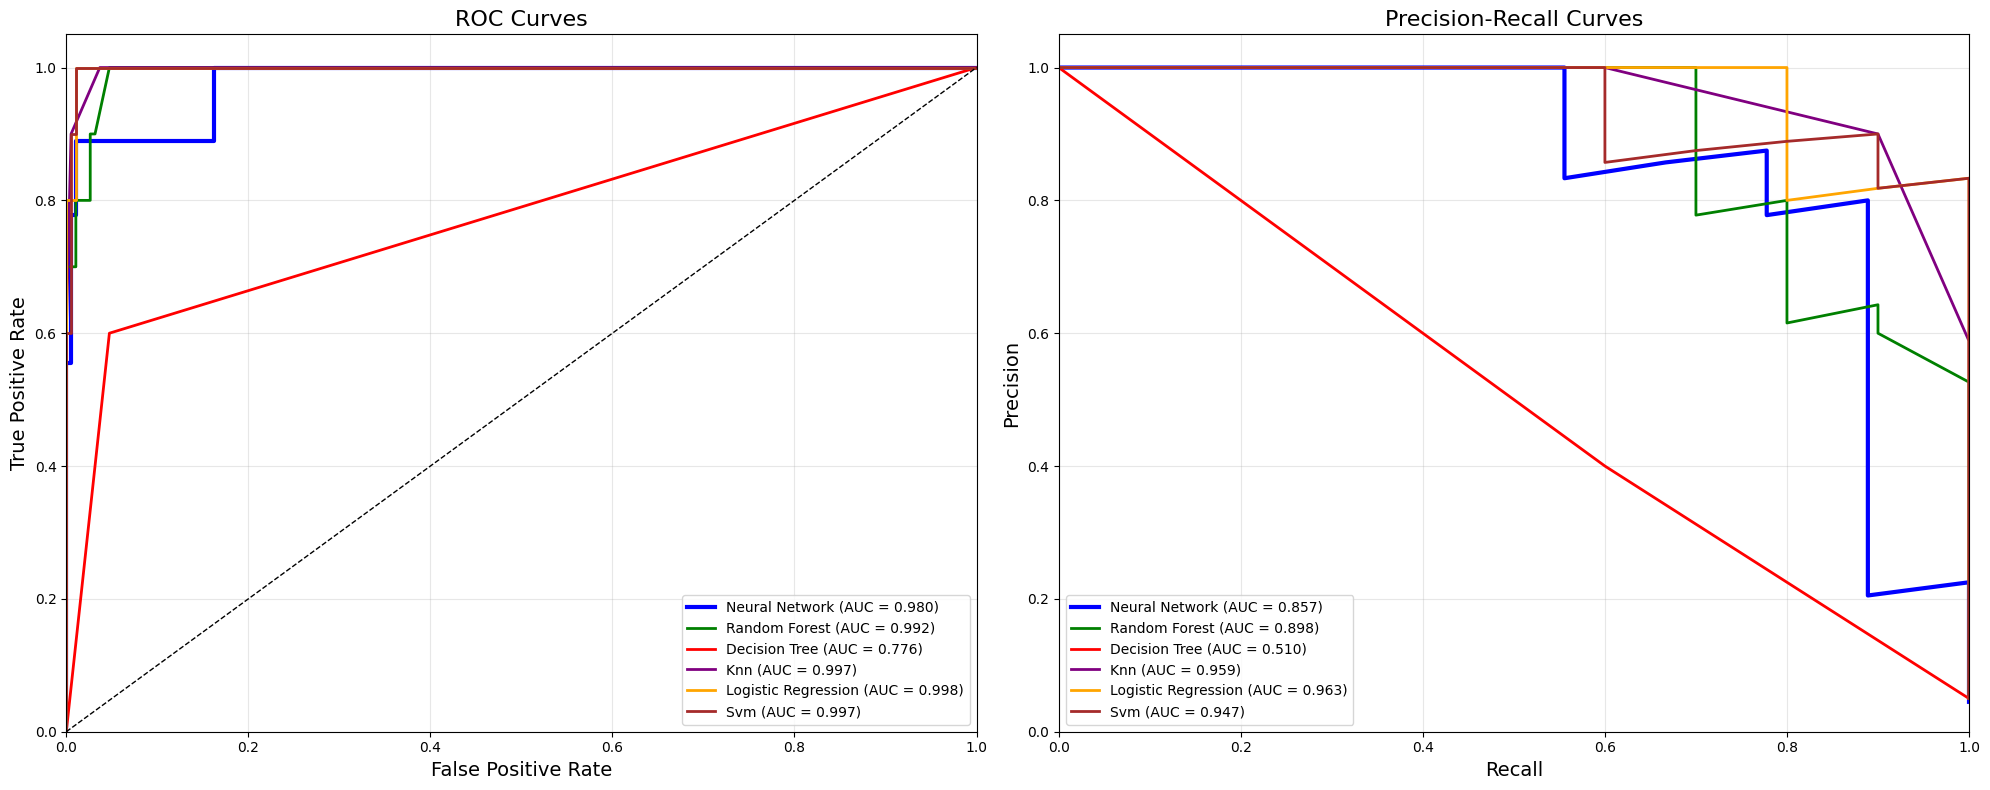

In [48]:
# Plot combined ROC and PR curves for all models
def plot_roc_pr_curves_combined(nn_results, classic_results):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot ROC curves on first subplot
    # Neural Network ROC curve
    nn_fpr, nn_tpr = nn_results["roc_curve_data"][-1]
    nn_roc_auc = nn_results["roc_auc"][-1]
    
    ax1.plot(
        nn_fpr, nn_tpr, 
        'b-', linewidth=3, 
        label=f'Neural Network (AUC = {nn_roc_auc:.3f})'
    )
    
    # Classical models ROC curves
    colors = ['green', 'red', 'purple', 'orange', 'brown']
    for i, (name, results) in enumerate(classic_results.items()):
        fpr, tpr = results['roc_curve_data'][-1]
        roc_auc = results['roc_auc'][-1]
        
        ax1.plot(
            fpr, tpr,
            color=colors[i % len(colors)], linewidth=2,
            label=f'{name.replace("_", " ").title()} (AUC = {roc_auc:.3f})'
        )
    
    # Add diagonal reference line
    ax1.plot([0, 1], [0, 1], 'k--', linewidth=1)
    
    # Formatting ROC plot
    ax1.set_xlim([0.0, 1.0])
    ax1.set_ylim([0.0, 1.05])
    ax1.set_xlabel('False Positive Rate', fontsize=14)
    ax1.set_ylabel('True Positive Rate', fontsize=14)
    ax1.set_title('ROC Curves', fontsize=16)
    ax1.legend(loc='lower right', fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Plot PR curves on second subplot
    # Neural Network PR curve
    nn_precision, nn_recall = nn_results["pr_curve_data"][-1]
    nn_pr_auc = nn_results["pr_auc"][-1]
    
    ax2.plot(
        nn_recall, nn_precision,
        'b-', linewidth=3,
        label=f'Neural Network (AUC = {nn_pr_auc:.3f})'
    )
    
    # Classical models PR curves
    for i, (name, results) in enumerate(classic_results.items()):
        precision, recall = results['pr_curve_data'][-1]
        pr_auc = results['pr_auc'][-1]
        
        ax2.plot(
            recall, precision,
            color=colors[i % len(colors)], linewidth=2,
            label=f'{name.replace("_", " ").title()} (AUC = {pr_auc:.3f})'
        )
    
    # Formatting PR plot
    ax2.set_xlim([0.0, 1.0])
    ax2.set_ylim([0.0, 1.05])
    ax2.set_xlabel('Recall', fontsize=14)
    ax2.set_ylabel('Precision', fontsize=14)
    ax2.set_title('Precision-Recall Curves', fontsize=16)
    ax2.legend(loc='best', fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
plot_roc_pr_curves_combined(nn_fold_results, cv_results)